# Unit 09: Applications II UV-Vis Spectroscopy

<a rel="license" href="https://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://licensebuttons.net/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Authors: 
- Dr Antonia Mey
- Jasmin Güven   

Email: antonia.mey@ed.ac.uk

Thanks to: Dr Rafal Szabla

### Learning objectives
By the end of this unit, you should be able to
* Read and manipulate'real' data files and troubleshoot them.
* Understand hidden characters in files.
* Estimate error bars and plot them from absorbance data.
* Analyse UV-Vis data using Beer-Lambert's law.
* Load protein trajectory data from a simulation.
* Compute running averages over trajectories (dataseries).

## Table of Contents

## Application UV-vis Spectroscopy
1. [Recap of ultraviolet visible spectroscopy](#1-recap-of-ultraviolet-visible-spectroscopy)  
    1.1 [Principles of colorimetry](#11-principles-of-colorimetry)    
    1.2 [Meet Rachel](#12-meet-rachel)    
    1.3 [Tasks 1](#tasks-1)    
2. [Estimating and plotting the error on an absorption spectrum](#2-estimating-and-plotting-the-error-on-an-absorption-spectrum)     
     2.1 [Tasks 2](#tasks-2)
3. [Find the unknown concentration of the compound based on Beer Lambert's Law](#3-find-the-unknown-concentration-of-the-compound-based-on-beer-lamberts-law)   
     3.1 [Tasks 3](#tasks-3)
    
[Next notebook](#next-notebook)


### Link to documentation:
You can find the full documentation at [scipy.org](https://scipy.org).

**<span style="color:black">Jupyter Cheat Sheet</span>**
- To run the currently highlighted cell and move focus to the next cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To run the currently highlighted cell and keep focus in the same cell, hold <kbd>&#x21E7; Ctrl</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

# Import libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os.path

# 1. Recap of ultraviolet visible spectroscopy
<a id='1-recap-of-ultraviolet-visible-spectroscopy'></a>
In this section you will learn how to analyse data you have collected with a UV-vis spectrometer such as [this one](https://www.agilent.com/en/product/molecular-spectroscopy/uv-vis-uv-vis-nir-spectroscopy/uv-vis-uv-vis-nir-systems/cary-60-uv-vis-spectrophotometer). UV-vis spectroscopy is very useful in determining the concentration of UV active compounds. 
Both transition metals and organic compounds with conjugated $\pi$ systems will often be active in the UV-visible region of light. 


<img src="images/light.jpg" alt="light" width="400">

## 1.1 Principles of Colorimetry <a id="11-principles-of-colorimetry"></a>
For example, The color of Allura Red solution is... red! Generally, the observed color is complementary to the color of light absorbed. In Figure 2, red is complementary to green. Thus, Allura Red absorbs primarily wavelengths in the 480-560 nm range. Wavelengths of 640-700 nm are not absorbed but transmitted, thus resulting in our perception of a red solution. 

<img src="images/light2.png" alt="light" width="300">

Take a look at the colour wheel of wavelengths of light corresponding to each color for transmission and absorbance. 
In general the higher the concentration of the compound that is absorbing light, the greater the absoprtion at that frequency. We will be looking at peaks of absorptions measured in the lab for this session. 

## 1.2. Meet Rachel <a id="12-meet-rachel"></a>

Rachel is a final year student and as part of her final year project she needs to estimate the unknown concentration of the dye Rhodamine 6G in methanol, because she forgot to label one of her samples. Luckily she can use UV-Vis spectroscopy of Rhodamine in methanol and use Beer Lambert's law to estimate the concentration of the unlabelled sample. Her data can be found in the folder `data/Section4`. She has never tried this analysis in Python before, so rather than working straight on the actual dataset she wanted to try some parts of her analysis on different sets of data first. 

Can you help her fix her code and find the concentration of her unlabelled sample? 

<img src="images/Rachel.png" alt="Rachel" width="200">

# Tasks 1 <a id="tasks-1"></a>

In the directory `data/Section1` you find a file called `Rhodamine 6G in methanol .csv` Rachel collected in the lab to measure the absorbance of the dye Rhodamine 6G with respect to wavelength. 

This is what Rhodamine 6G looks like:
<img src="images/Rhodamine_6G.png" alt="drawing" width="200">

<div class="alert alert-success">
    <b>Tas; 1.1 </b>: Read the data and plot it in a sensible way. (Try different ways, pandas, numpy, or even a completely different way). 
</div>

In [2]:
# FIXME


<details>
<summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 1.1</summary>
    
```python
# pandas way
data = pd.read_csv("data/Section1/Rhodamine 6G in methanol .csv", names=["lam","absorb", "not_needed"], skiprows=2)
fig, ax = plt.subplots(1,1)
ax.plot(data["lam"], data["absorb"], marker ="o", ms=2, alpha=0.7, color="darkblue")
ax.set_xlabel("wavelength $\lambda$ (nm)", fontsize=15)
ax.set_ylabel("Absorbance (arb. units)", fontsize=15)
plt.show()
    
# numpy way
data = np.loadtxt("data/Section1/Rhodamine 6G in methanol .csv",skiprows=2, usecols=[0,1], delimiter=",")
fig, ax = plt.subplots(1, 1)
ax.plot(data[:,0], data[:,1], marker ="o", ms=2, alpha=0.7, color="darklue")
ax.xlabel("wavelength $\lambda$ (nm)", fontsize=15)
ax.ylabel("Absorbance (arb. units)", fontsize=15)
plt.show()
```

</details>

<div class="alert alert-success">
    <b>Task 1.2</b> : Find the highest absorbance peak in the data file:  "data/Section1/Rhodamine 6G in methanol .csv".
</div>

In [3]:
# FIXME

<details><summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 1.2 </summary>
    
```python
# SOLUTION
import scipy.signal
# with pandas
idxs, heights = scipy.signal.find_peaks(data["absorb"], height = 0.03)
# with numpy
idxs, heights = scipy.signal.find_peaks(data[:,1], height = 0.03)

```

</details>

# 2. Estimating and plotting the error on an absorption spectrum <a id="2-estimating-and-plotting-the-error-on-an-absorption-spectrum"></a>

Rachel has taken 5 repeat measurements of PAO in ethanol at a given concentration, another UV-vis active molecule. She wants to know what the error on the absorbance is for this measurement. Rather than plotting the 5 repeats in one plot, she wants a plot of the mean absorbance and the standard deviation of the absorbance as error bars. 

Can you help her with this? 

The data can be found in `data/Section2`. 

Here is an example of all the data in one plot:

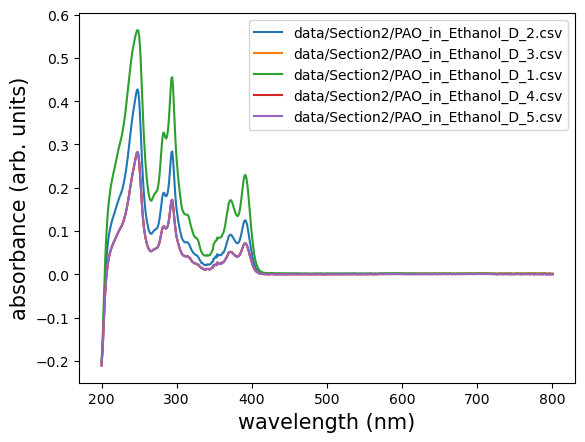

In [4]:
pao_data_files = glob.glob("data/Section2/*.csv")
fig, ax = plt.subplots()
for d_file in pao_data_files:
    data = pd.read_csv(d_file, names=["lam","absorb", "not_needed"], skiprows=2)
    ax.plot(data["lam"], data["absorb"], label=d_file)
    ax.legend()
ax.set_xlabel("wavelength (nm)", fontsize=15)
ax.set_ylabel("absorbance (arb. units)", fontsize=15)
plt.show()

# Tasks 2 <a id="tasks-2"></a>

<div class="alert alert-success">
    <b>Task 2.1</b>: Rachel has started writing code that will help her find the mean of each 5 measures of absorbance at each wavelength, as well as the standard deviation, can you help her fix her code in the cells below? You don't have to use the same way she started to solve the problem if you prefer a different and maybe easier route!
</div>

<div class="alert alert-info">
    <b>Hint</b>: Use the print function to help you debug some of her code! Try out the bits that fail. Google errors you get!
</div>

In [5]:
# Rachel's attempt

wavelengths_array = []
absorbance_array = []

# Let's first read the data into an numpy array
for d_file in pao_data_files:
    data = pd.read_csv(d_file, names=["lam","absorb", "not_needed"], skiprows=2)
    if wavelengths_array is None:
        wavelengths_array = data["lam"].tolist()
    else:
        assert(data["lam"] == wavelengths_array)
        print("we already have wavelengths and they match")
    absorbance_array.append(data["absorb"].tolist())
    
# Convert the two lists to numpy arrays
wave_lengths = np.array(wavelengths_array)
absorbance = np.array(absorbance_array)

# Work out the mean and standar deviation of the absorbance array
print("Do I need another loop here or can I work out the mean and error differently?")
mean_absorbance = None
std_absorbance = None

ValueError: ('Lengths must match to compare', (601,), (0,))

<details>
<summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 2.1</summary>
    
```python
wavelengths_array = []
absorbance_array = []
for d_file in pao_data_files:
    data = pd.read_csv(d_file, names=['lam','absorb', 'not_needed'], skiprows=2)
    if len(wavelengths_array) < len(data['lam']):
        wavelengths_array = data['lam'].tolist()
    else:
        if ((data['lam'] == wavelengths_array).all()):
            print('we already have wavelengths and they match!')
    absorbance_array.append(data['absorb'].tolist())

# Convert the two lists to numpy arrays
wave_lengths = np.array(wavelengths_array)
absorbance = np.array(absorbance_array)

# Mean and std of absorbance using axes in numpy
mean_absorbance = np.mean(absorbance, axis=0)
std_absorbance = np.std(absorbance, axis=0)

```

</details>

<div class="alert alert-success">
    <b>Task 2.2</b>: Can you show Rachel how to plot the mean and the standard deviation as an errorbar plot? Only plot the region of wavelengths between 200 nm and 400 nm.
</div>

In [ ]:
# FIXME


<details>
<summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 2.2 </summary>
    
```python

fig, ax = plt.subplots(figsize=(10,5))

ax.errorbar(wave_lengths,mean_absorbance,yerr=std_absorbance, label="5 measurement average")
ax.set_xlabel("wavelength (nm)", fontsize = 15)
ax.set_ylabel("absorbance (arb. units)", fontsize =15)
ax.set_xlim(200, 400)
ax.legend()
plt.show()

```

</details>

<div class="alert alert-info">
    <b>Task 2.3 (advanced) </b>: Rather than using error bars on each data point can you use a shaded region to indicate the 1 σ confidence interval instead? Look at the example below. 
</div>

**Hint**: Take a look at the function `fill_between` in [matplotlib](https://matplotlib.org).

<img src="images/fill-between.png" alt="fill" width="400">

In [ ]:
# FIXME

<details><summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 2.3 (advanced)</summary>

```python

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(wave_lengths,mean_absorbance, label="5 measurement average")
ax.fill_between(wave_lengths, mean_absorbance + std_absorbance, mean_absorbance - std_absorbance, alpha=0.5)
ax.set_xlabel("wavelength (nm)", fontsize = 15)
ax.set_ylabel("absorbance (arb. units)", fontsize =15)
ax.set_xlim(200, 400)
ax.legend()
plt.show()

```


## 3. Find the unknown concentration of the compound based on Beer Lambert's Law 
<a id="3-find-the-unknown-concentration-of-the-compound-based-on-beer-lamberts-law"></a>

In this section we will put some of the indidividual parts together of the previous sections to help identify Rachel the concentration of the sample series E she measured, but forgot to write down the concentration.

You will find her experimental absorbance data in `data/Section3`. For each concentration there are 3 measurements. There is a file called `data/Section3/concentrations.csv`, that tell you which sample had which concentration. For some reason sample `C` has noted down a concentration of `NaN`. You should be able to figure out the concentration at which the sample was measured though based on Beer Lambert's Law. You can use the data you have to create a calibration plot and make sure of the linearity of the Beer Lambert law. It stats that the absorption of light by a substance is proportional to its concentration in solution, or in equation format:

$$A = \epsilon l c,$$

where $A$ is the absorbance (unitless), $\epsilon$ is the molar absorptivity coefficient (M$^{-1}$cm$^{-1}$), $l$ is the pathlength of light through the cuvette (cm), and $c$ is the concentration (M).

A typical calibration curve will look like this:


<img src="images/beer_law.png" alt="calibration" width="400">

In Rachel's case she has 4 repeat measurements of her absorbance with known concentration and 3 repeats of a measurements with unknown concentration. In this section you will reconstruct what the concentration of Rhodamine 6G was in sample `C`. 

# Tasks 3 <a id="tasks-3"></a>

<div class="alert alert-success">
    <b>Task 3.1</b>: Compute the mean absorbance curve of each concentration and plot these.
</div>

- Write a function called `mean_absorbance` to easily loop over this. You should be able to reuse what you have done in [Section 2](#2-estimating-and-plotting-the-error-on-an-absorption-spectrum) and wrap this into a function.
- Loop over all 5 data sets and compute mean absorbance and plot the absorbance v. wavelength (don't worry about error bars this time)

In [15]:
# FIXME


<details>
<summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 3.1 </summary>
    
```python

def mean_absorbance(file_names):
    """takes list of filenames with absorbances"""
    wavelengths_array = []
    absorbance_array = []
    for d_file in file_names:
        data = pd.read_csv(d_file, names=["lam","absorb","not_needed"], skiprows=2)
        if len(wavelengths_array) < len(data["lam"]):
            wavelengths_array = data["lam"].tolist()
        else:
            if ((data["lam"] == wavelengths_array).all()):
                absorbance_array.append(data["absorb"].tolist())

    # Convert the two lists to numpy arrays
    wave_lengths = np.array(wavelengths_array)
    absorbance = np.array(absorbance_array)

    # Mean and std of absorbance using axes in numpy
    mean_absorbance = np.mean(absorbance, axis=0)
    std_absorbance = np.std(absorbance, axis=0)
    return wave_lengths,mean_absorbance

fig, ax = plt.subplots()
for concentrations in ["A", "C", "D", "E", "F"]:
    f_names_c = glob.glob(f"data/Section3/*{concentrations}*.csv")
    lams, absorbs = mean_absorbance(f_names_c)
    ax.plot(lams,absorbs, label=concentrations)
    ax.set_xlim(450,550)
    ax.set_ylim(0.0,0.12)
    ax.legend()
    ax.set_xlabel("wavelength (nm)")
    ax.set_ylabel("absorbance (arb. units)")
plt.show()

```

</details>

<div class="alert alert-success">
    <b>Task 3.2</b>: Find the peak absorbance data at 530 nm for each concentration.
</div>

- Fix Rachel's function called `find_peak_absorbance` to find peaks around 530 nm.
- Collect the data in a list called `absorbance_peaks`

Hint: You can find maxima with either `scipy.signal` or define a wavelength range where you know you only have one peak signal. Use boolean masks to define index ranges of e.g. 500-550 nm ranges to then find a maximum in the absorbance in this range. 

There are many different ways to solve this problem, so be creative!

In [ ]:
def find_peak_absorbance(absorbance_data, wave_lengths, idx_of_wavelength_range=None, height=None):
    """find peak absorbance in a given range of wavelengths
    Parameters:
    -----------
    absorbance_data : array
        array of all the whole dataset
    
    wave_lengths : nd array 
        array corresponding to the wave_lengths
    
    idx_of_wavelength_range : 
        indexes of absorbance data array that correspond to e.g. 500-550 nm wavelength range
    
    height: float 
        peak height used by scipy.signal.find_peaks
        
    Returns:
    --------
    wave_length_at_max : float
        wavelength of the corresponding absorbance maximum
    max_absorbance : float
        data point we are after
    
    """
    # FIXME
    return wave_length_at_max, max_absorbance

In [ ]:
# There are some issues in the code below too can you find them?
# FIXME
# Define the list
absorbance_peaks = []
# loop over concentrations
for concentrations in ['A', 'C', 'D', 'E', 'F']:
    f_names_c = glob.glob('data/Section3/*'+concentrations+"*.csv")
    # get the mean absorbance and wavelengths
    wave_lengths, absorbance_at_given_c = mean_absorbance(f_names_c)
    # find the indexes using a boolean mask
    wave_length_idxs = np.where(wave_lengths> 450 & wavelngths < 550)
    wavelength_max, absorbance_max = find_peak_absorbance(absorbance_at_given_c, wave_legth, idx_of_wavelength_range=wave_length_idxs, height=0.012)
    print(wavelength_max,absorbance_max)
    absorbance_peaks.append(absorbance_max)

<details>
<summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 3.2 </summary>
    
```python

def find_peak_absorbance(data, wave_lengths=None, idx_of_wavelength_range=None, height=None):
    """find peak absorbance in a given range of wavelengths
    Parameters:
    -----------
    absorbance_data : array
        array of all the whole dataset
    
    wave_lengths : nd array 
        array corresponding to the wave_lengths
    
    idx_of_wavelength_range : 
        indexes of absorbance data array that correspond to e.g. 500-550 nm wavelength range
    
    height: float 
        peak height used by scipy.signal.find_peaks
        
    Returns:
    --------
    wave_length_at_max : float
        wavelength of the corresponding absorbance maximum
    max_absorbance : float
        data point we are after
    
    """   
    idxs, heights = scipy.signal.find_peaks(data[idx_of_wavelength_range], height = height)
    max_absorbance = np.max(data[idx_of_wavelength_range])
    max_absorbance_index = np.argmax(data[idx_of_wavelength_range])
    wave_length_at_max = wave_lengths[idx_of_wavelength_range][max_absorbance_index]
    if max_absorbance_index in idxs:
        print("Found peak")
        return wave_length_at_max, max_absorbance
    else:
        print('encountered an issue")
        return None
    
# Define the list (or a dictionary)
absorbance_peaks = []
# loop over concentrations
for concentrations in ["A", "C", "D", "E", "F"]:
    f_names_c = glob.glob(f"data/Section3/*{concentrations}*.csv")
    # get the mean absorbance and wavelengths
    wave_lengths, absorbance_at_given_c = mean_absorbance(f_names_c)
    # find the indexes in the 
    bool_array = (wave_lengths > 450) & (wave_lengths < 550)
    wave_length_idxs = np.where(bool_array)[0]
    wavelength_max, absorbance_max = find_peak_absorbance(absorbance_at_given_c, wave_lengths, idx_of_wavelength_range=wave_length_idxs, height=0.012)
    print(wavelength_max,absorbance_max)
    absorbance_peaks.append(absorbance_max)

```

</details>

<div class="alert alert-success">
    <b>Task 3.3</b>: Read in known concentrations and plot concentration against absorbance. 
</div>

- Rachel has made a file with all the concentrations you can find in `data/Section3/concentrations.csv`. This is where you will notice that for `C` the entry is `NaN`. 

In [ ]:
# FIXME


<details>
<summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 3.3 </summary>
    
```python

concentrations = np.loadtxt("data/Section3/concentrations.csv", delimiter=",", skiprows=2)
absorbance_peaks = np.array(absorbance_peaks)
concentrations = concentrations.astype(np.double)
concentration_mask = np.isfinite(concentrations)

print(concentration_mask)
fig, ax = plt.subplots()
ax.plot(concentrations[concentration_mask], absorbance_peaks[concentration_mask], "o")
ax.set_xlabel("concentration (mol/L)", fontsize=15)
ax.set_ylabel("absorbance (arb. units)", fontsize=15)
plt.show()
```

</details>

<div class="alert alert-success">
    <b>TASK 3.4</b>: Find the concentration of sample C based on Beer Lambert's Law.  
</div>

In [ ]:
# FIXME

<details>
<summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 3.4</summary>
    
```python
from scipy import stats
c = concentrations[concentration_mask]
a = absorbance_peaks[concentration_mask]
res = stats.linregress(c, a)
concentration_of_c = absorbance_peaks[1]/ res.slope - res.intercept 
print(f"Concentration of sample C is {concentration_of_c:.4f} mM.")
    
# And a reassurance plot
fig, ax = plt.subplots()
ax.plot(c, a, "o", label="absorbance peaks")
ax.plot(np.array(c), res.intercept + res.slope*np.array(c), "r", label="fitted line")
ax.legend()
ax.set_xlabel("concentration")
ax.set_ylabel("absorance")
plt.show()
```

</details>

## Break
<img src="images/break.png" alt="drawing" width="200">

# Next notebook <a id="next-notebook">

[Unit 09 Applications II Part II](Unit_09_applications_II_part_II.ipynb)

---